In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
#dataset information we want to predict MEDV
#print(boston['DESCR']) 

In [4]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [5]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
y = pd.DataFrame(boston.target,columns=['Price'])
y.head(2)

,Price
0,24.0
1,21.6


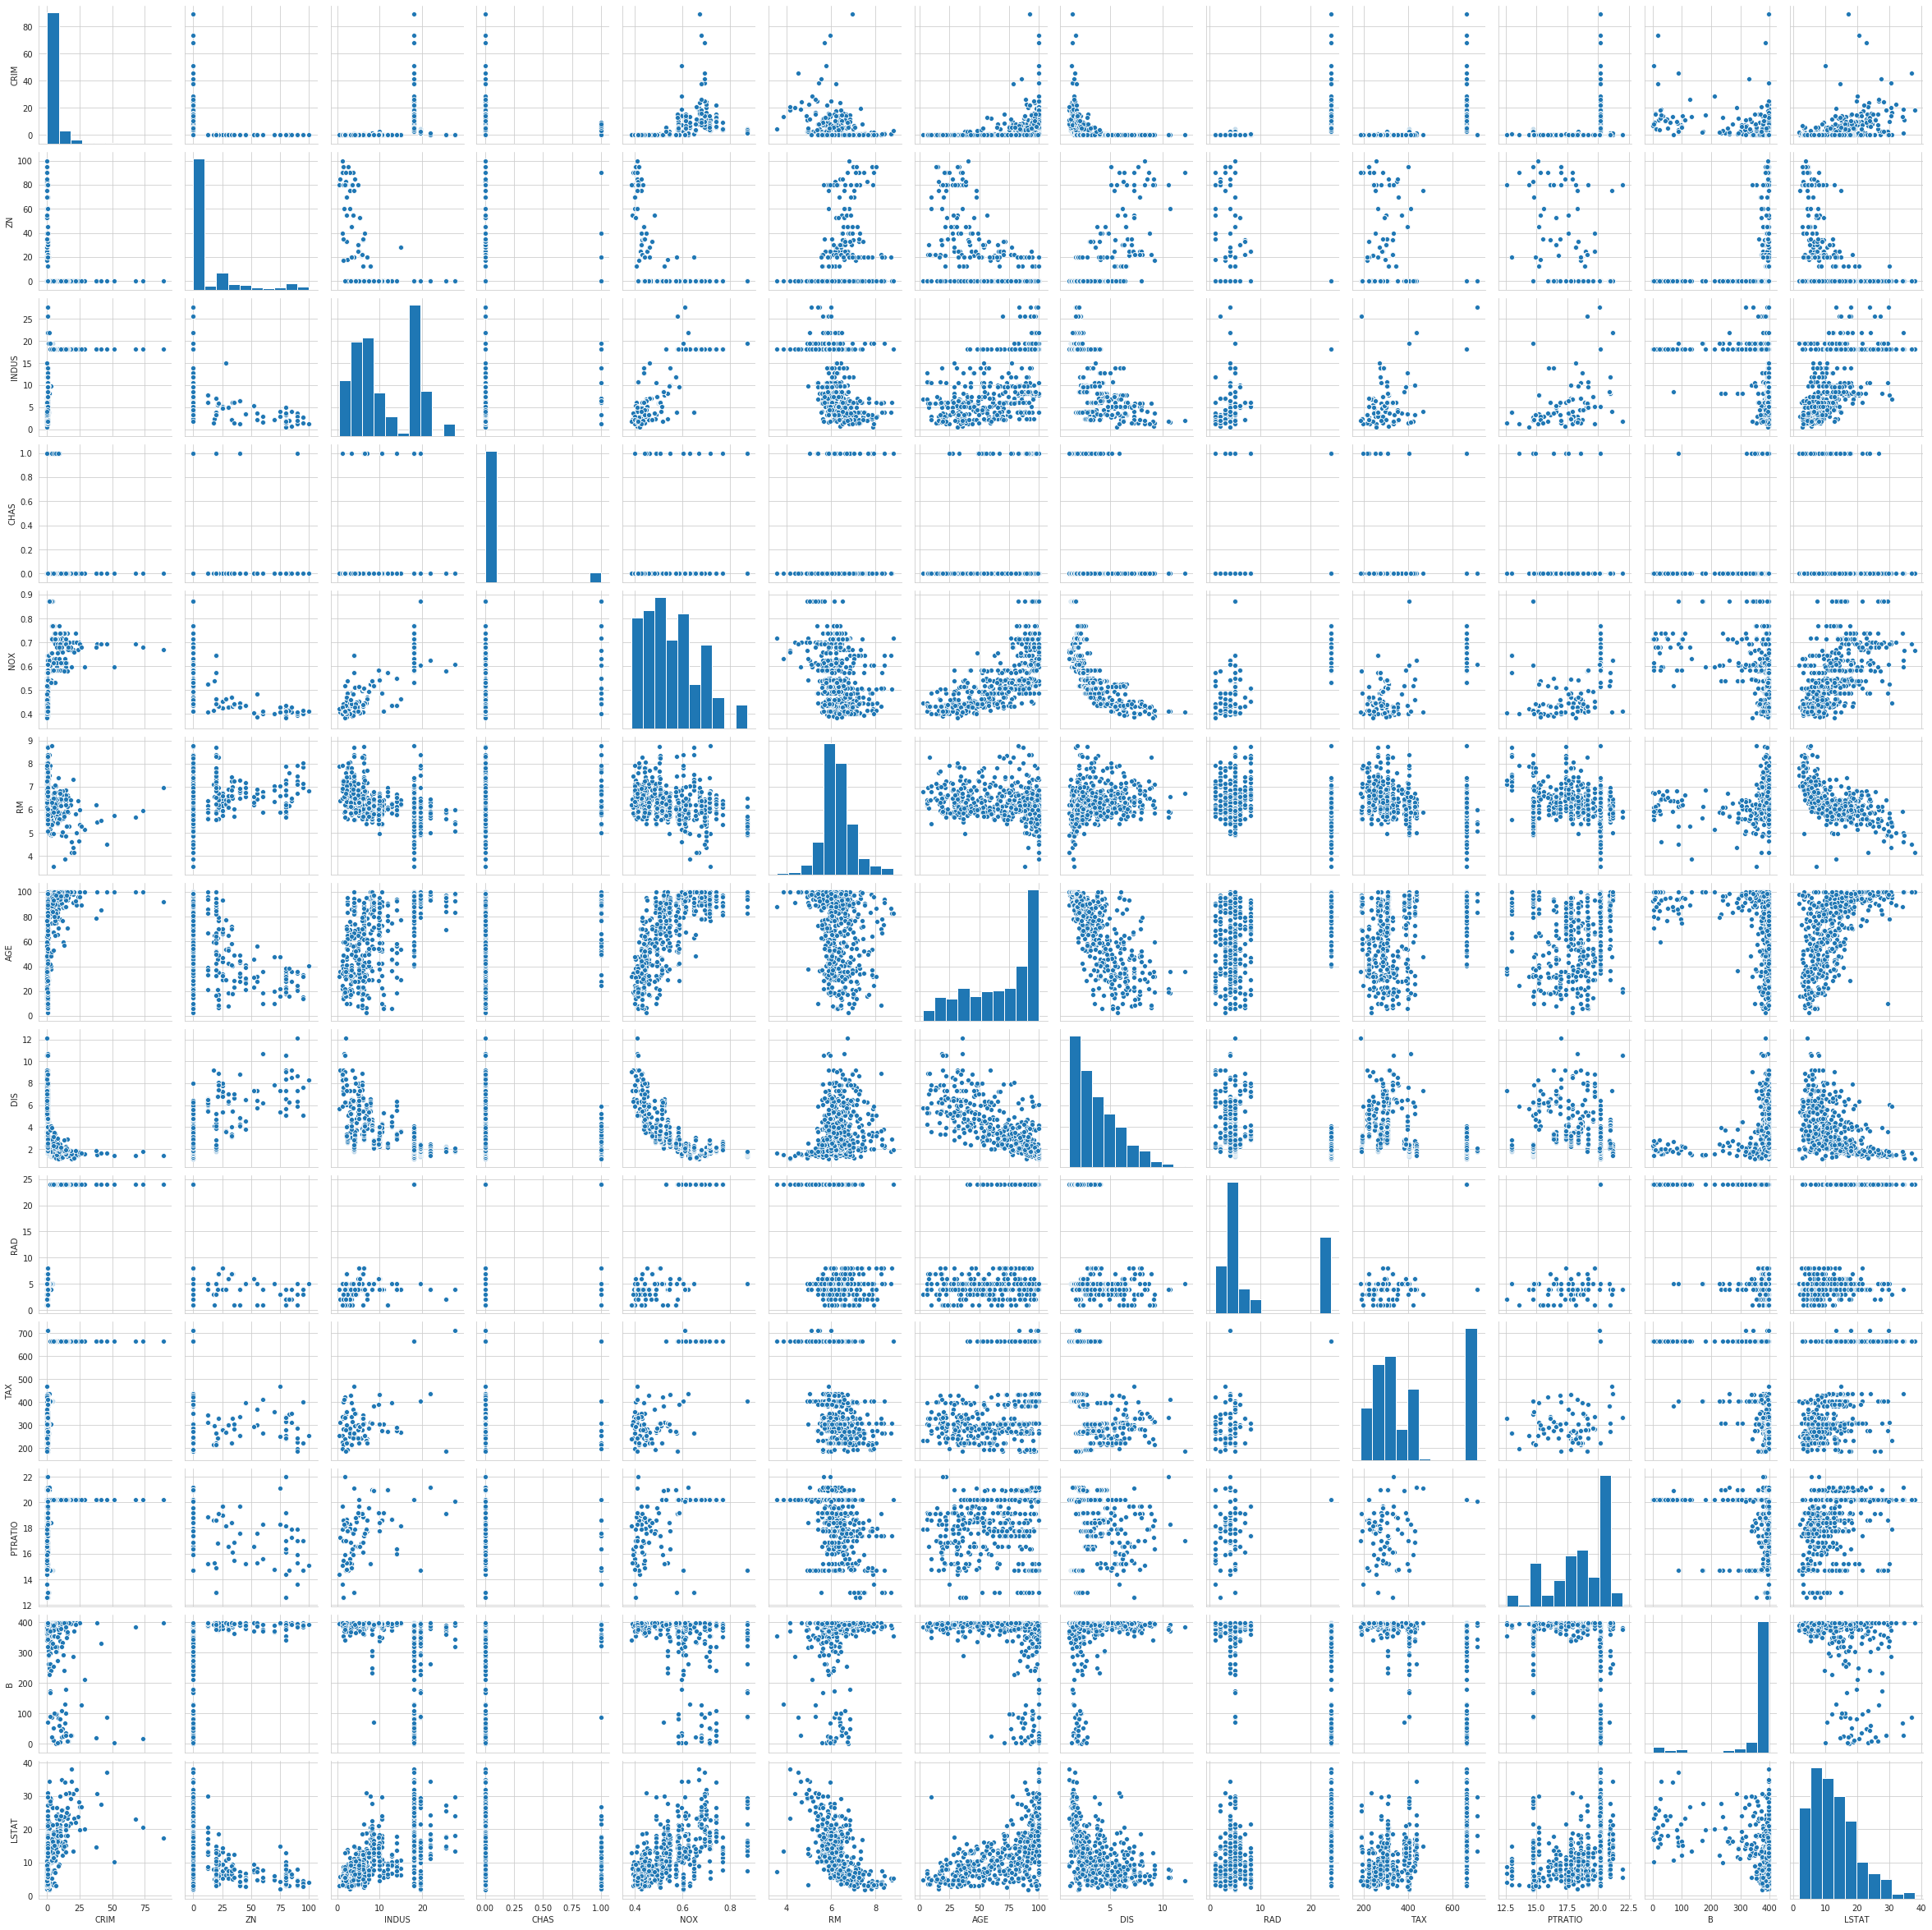

In [7]:
sns.pairplot(X) #pairplot of all the attributes

In [8]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(lm.intercept_)

[40.21892901]


In [27]:
lm.coef_[0]

array([-8.85049752e-02,  5.02928536e-02,  2.03483110e-02,  3.75427054e+00,
       -1.77483714e+01,  3.24776492e+00,  1.20008182e-02, -1.40916141e+00,
        2.63880691e-01, -1.03440009e-02, -9.51780874e-01,  6.11600491e-03,
       -5.97133217e-01])

In [28]:
pd.DataFrame(data=lm.coef_[0],index=X.columns,columns=['Coeff'])

,Coeff
CRIM,-0.088505
ZN,0.050293
INDUS,0.020348
CHAS,3.754271
NOX,-17.748371
RM,3.247765
AGE,0.012001
DIS,-1.409161
RAD,0.263881
TAX,-0.010344


In [29]:
predictions = lm.predict(X_test)

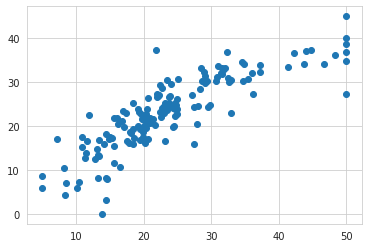

In [30]:
plt.scatter(y_test,predictions)

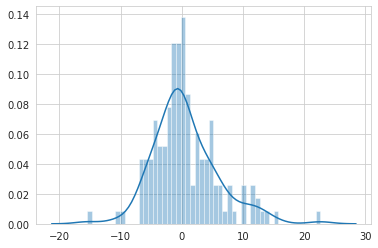

In [34]:
sns.distplot(y_test-predictions, bins=50)

In [32]:
from sklearn import metrics

In [33]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  3.835696361418927
MSE:  28.547585271468208
RMSE:  5.342994036256096
